<a href="https://colab.research.google.com/github/abasilio91/aulas_ANN_ufu/blob/main/img_recon_AI_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import tensorflow as tf
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
 from tensorflow.keras.optimizers import Adam
 from tensorflow.keras.metrics import categorical_crossentropy
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from sklearn.metrics import confusion_matrix
 import itertools
 import os
 import shutil
 import random
 import glob
 import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/abasilio91/aulas_ANN_ufu/

Cloning into 'aulas_ANN_ufu'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 86 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [3]:
%cd aulas_ANN_ufu/

/content/aulas_ANN_ufu


# Preprocessing

In [5]:
import zipfile as zp

file_name = 'cats_and_dogs.zip'

extracted = zp.ZipFile(file_name,'r')
extracted.extractall()

In [6]:
%cd cats_and_dogs/

if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('val/dog')
  os.makedirs('val/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

/content/aulas_ANN_ufu/cats_and_dogs


In [ ]:
# Each animal has 300 pictures. It was arbitrarily selected the values of 250 pictures to train, 40 to validate and 10 to test for each one.
# This section randomly select pictures to be moved to the assigned label.

for c in random.sample(glob.glob('cat*'), 250):
  shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('cat*'), 40):
  shutil.move(c, 'val/cat')
for c in random.sample(glob.glob('cat*'), 10):
  shutil.move(c, 'test/cat')

for c in random.sample(glob.glob('dog*'), 250):
  shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('dog*'), 40):
  shutil.move(c, 'val/dog')
for c in random.sample(glob.glob('dog*'), 10):
  shutil.move(c, 'test/dog')

%cd ../..

In [68]:
train_path = 'aulas_ANN_ufu/cats_and_dogs/train'
test_path = 'aulas_ANN_ufu/cats_and_dogs/test'
val_path = 'aulas_ANN_ufu/cats_and_dogs/val'

In [83]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path, target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 500 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [84]:
imgs, labels = next(train_batches)

In [85]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


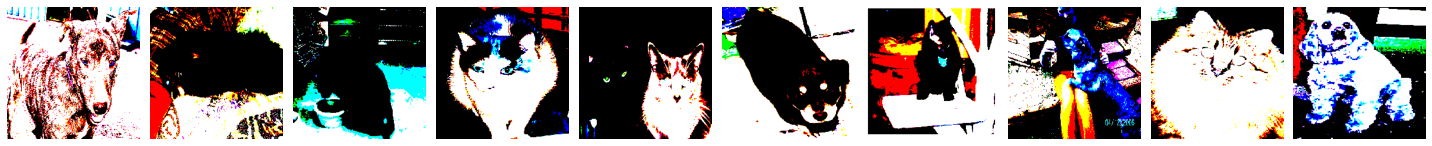

In [86]:
plotImages(imgs)
print(labels)

# building and training the CNN

In [87]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Flatten(),
                    Dense(units=2, activation='softmax')
])

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [89]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(x=train_batches, validation_data=val_batches, epochs=10, verbose=2)

Epoch 1/10
50/50 - 40s - loss: 25.2816 - accuracy: 0.4920 - val_loss: 24.6061 - val_accuracy: 0.4875
Epoch 2/10
50/50 - 40s - loss: 5.7917 - accuracy: 0.7080 - val_loss: 6.8287 - val_accuracy: 0.6875
Epoch 3/10
50/50 - 40s - loss: 1.2458 - accuracy: 0.8900 - val_loss: 6.1759 - val_accuracy: 0.6125
Epoch 4/10
50/50 - 40s - loss: 0.5613 - accuracy: 0.9220 - val_loss: 5.6889 - val_accuracy: 0.6375
Epoch 5/10
50/50 - 39s - loss: 0.1559 - accuracy: 0.9540 - val_loss: 5.5042 - val_accuracy: 0.6250
Epoch 6/10
50/50 - 38s - loss: 0.1755 - accuracy: 0.9620 - val_loss: 4.8471 - val_accuracy: 0.6500
Epoch 7/10
50/50 - 38s - loss: 0.0485 - accuracy: 0.9920 - val_loss: 4.6439 - val_accuracy: 0.6625
Epoch 8/10
50/50 - 38s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 4.5768 - val_accuracy: 0.6500
Epoch 9/10
50/50 - 38s - loss: 6.4421e-04 - accuracy: 1.0000 - val_loss: 4.6294 - val_accuracy: 0.6625
Epoch 10/10
50/50 - 38s - loss: 5.7617e-05 - accuracy: 1.0000 - val_loss: 4.6253 - val_accuracy: 0.6625

# Predicting new results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


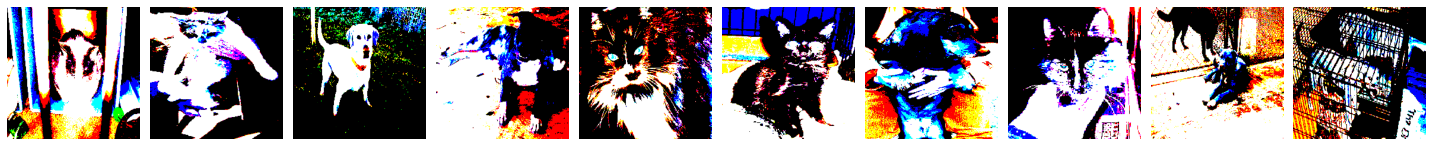

In [77]:
 test_imgs, test_labels = next(test_batches)
 plotImages(test_imgs)
 print(test_labels)

In [78]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [79]:
predictions = model.predict(x=test_batches, verbose=0)

In [80]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [81]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [82]:
def plot_confusion_matrix(cm,classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')

  else:
    print('Confusion matrix, without normalization')

  print(cm)
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [90]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[3 7]
 [4 6]]


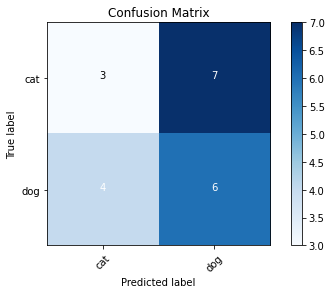

In [91]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')